In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Loads stars info.
stars = pd.read_csv('50stars.csv', sep=',', header=0)

In [3]:
# Calculates star's distance and color
stars['Distancia en Parsecs'] = 1000/stars['Plx']
stars['Distancia en UA'] = 206265*stars['Distancia en Parsecs']
stars['Color'] = stars['B-V'].map(lambda b_v: 'N/A' if math.isnan(b_v) else ('Azul' if b_v < 0 else 'Roja'))
stars

,Numero Estrella,Plx,MovimientoPropio,Magnitud,B-V,alpha,delta,Distancia en Parsecs,Distancia en UA,Color
0,1,772.33,-3775.64,11.01,1.807,14 29 47.75,-62 40 52.9,1.294783,267068.481090,Roja
1,2,742.12,-3600.35,1.35,0.900,14 39 39.39,-60 50 22.1,1.347491,277940.225300,Roja
2,3,742.12,-3678.19,-0.01,0.710,14 39 40.90,-60 50 06.5,1.347491,277940.225300,Roja
3,4,549.01,-797.84,9.54,1.570,17 57 48.97,+04 40 05.8,1.821460,375703.539098,Roja
4,5,392.40,-580.20,7.49,1.502,11 03 20.61,+35 58 53.3,2.548420,525649.847095,Roja
5,6,379.21,-546.01,-1.44,0.009,06 45 09.25,-16 42 47.3,2.637061,543933.440574,Roja
6,7,336.48,637.55,10.37,1.510,18 49 48.96,-23 50 08.8,2.971945,613008.202568,Roja
7,8,310.75,-976.44,3.72,0.881,03 32 56.42,-09 27 29.9,3.218021,663765.084473,Roja
8,9,303.90,6767.26,7.35,1.483,23 05 47.17,-35 51 22.7,3.290556,678726.554788,Roja
9,10,299.58,605.62,11.12,1.746,11 47 44.04,+00 48 27.1,3.338007,688513.919487,Roja


In [4]:
# Counts stars by color.
num_rojas = sum(stars['Color'] == 'Roja')
num_azules = sum(stars['Color'] == 'Azul')
print('Número de Rojas: {0}'.format(num_rojas))
print('Número de Azules: {0}'.format(num_azules))
print('Sin información: {0}'.format(50 - num_rojas - num_azules))

Número de Rojas: 47
Número de Azules: 0
Sin información: 3


In [5]:
# Counts stars by magnitude.
# Es de notar que la estrella más cercana no es visible a simple vista.
num_no_visibles = sum(stars['Magnitud'] > 6)
num_visibles = sum(stars['Magnitud'] <= 6)
print('Número de Visible: {0}'.format(num_visibles))
print('Número de No Visible: {0}'.format(num_no_visibles))
print('Sin información: {0}'.format(50 - num_visibles - num_no_visibles))

Número de Visible: 11
Número de No Visible: 39
Sin información: 0


In [6]:
# Identifies binary stars 
# El catalogo no reconoce todas las binarias. Sirius B no se encuentra! Sirius A tiene el Num Estrella 6 y en ningún 
# lugar hay alguna con coordenadas cercanas y mov. propio similar. 
# Al parecer, hiparco a veces reconoce sistemas binarios pero los cataloga dentro de la misma entrada para su centro
# de masa. 
# http://vizier.u-strasbg.fr/viz-bin/VizieR?-6N&-out.form=H0&//*&-5N&%3C%22Label%22&catid%3D1239&tabid%3D1&colid%3D10

binary_system_1 = stars[stars['Numero Estrella'].isin((2, 3))] # alpha centauri
bynary_system_2 = stars[stars['Numero Estrella'].isin((11, 13))] # 61 cygni 
bynary_system_3 = stars[stars['Numero Estrella'].isin((14, 15))] # no es visible, no tiene nombre famoso
bynary_system_4 = stars[stars['Numero Estrella'].isin((25, 30))] # no es visible, no tiene nombre famoso

binary_systems = pd.concat([binary_system_1, bynary_system_2, bynary_system_3, bynary_system_4])
binary_systems

,Numero Estrella,Plx,MovimientoPropio,Magnitud,B-V,alpha,delta,Distancia en Parsecs,Distancia en UA,Color
1,2,742.12,-3600.35,1.35,0.900,14 39 39.39,-60 50 22.1,1.347491,277940.225300,Roja
2,3,742.12,-3678.19,-0.01,0.710,14 39 40.90,-60 50 06.5,1.347491,277940.225300,Roja
10,11,287.13,4155.10,5.20,1.069,21 06 50.84,+38 44 29.4,3.482743,718367.986626,Roja
12,13,285.42,4107.40,6.05,1.309,21 06 52.19,+38 44 03.9,3.503609,722671.852008,Roja
13,14,284.48,-1393.20,9.70,1.561,18 42 48.51,+59 37 20.5,3.515186,725059.758155,Roja
14,15,280.28,-1326.88,8.94,1.504,18 42 48.22,+59 37 33.7,3.567861,735924.789496,Roja
24,25,235.24,-1389.70,11.72,1.480,14 49 33.51,-26 06 21.7,4.250978,876827.920422,Roja
29,30,221.80,-1421.60,12.07,1.524,14 49 32.69,-26 06 40.2,4.508566,929959.422904,Roja


In [7]:
# Hora de culminacion para el 4 de Marzo.
# La ascensión recta del Sol es de 0 h para el 20 de Marzo. Es entonces de aprox. 23 h para el 4 de Marzo.
# Se asume que el Sol culmina a las 12 h.
alpha_test = '14 39 39.39'
def HC_star(alpha_star):
    alpha_sun = 23
    HC_sun = 12
    HC_star_hours = int(alpha_star.split()[0]) - alpha_sun + HC_sun
    if HC_star_hours < 0:
        HC_star_hours = HC_star_hours + 24
    if HC_star_hours > 24:
        HC_star_hours = HC_star_hours - 24
    return str(HC_star_hours) + ' ' + alpha_star.split()[1] + ' ' + alpha_star.split()[2]
stars['HCMarzo4'] = stars['alpha'].map(HC_star)
stars

,Numero Estrella,Plx,MovimientoPropio,Magnitud,B-V,alpha,delta,Distancia en Parsecs,Distancia en UA,Color,HCMarzo4
0,1,772.33,-3775.64,11.01,1.807,14 29 47.75,-62 40 52.9,1.294783,267068.481090,Roja,3 29 47.75
1,2,742.12,-3600.35,1.35,0.900,14 39 39.39,-60 50 22.1,1.347491,277940.225300,Roja,3 39 39.39
2,3,742.12,-3678.19,-0.01,0.710,14 39 40.90,-60 50 06.5,1.347491,277940.225300,Roja,3 39 40.90
3,4,549.01,-797.84,9.54,1.570,17 57 48.97,+04 40 05.8,1.821460,375703.539098,Roja,6 57 48.97
4,5,392.40,-580.20,7.49,1.502,11 03 20.61,+35 58 53.3,2.548420,525649.847095,Roja,0 03 20.61
5,6,379.21,-546.01,-1.44,0.009,06 45 09.25,-16 42 47.3,2.637061,543933.440574,Roja,19 45 09.25
6,7,336.48,637.55,10.37,1.510,18 49 48.96,-23 50 08.8,2.971945,613008.202568,Roja,7 49 48.96
7,8,310.75,-976.44,3.72,0.881,03 32 56.42,-09 27 29.9,3.218021,663765.084473,Roja,16 32 56.42
8,9,303.90,6767.26,7.35,1.483,23 05 47.17,-35 51 22.7,3.290556,678726.554788,Roja,12 05 47.17
9,10,299.58,605.62,11.12,1.746,11 47 44.04,+00 48 27.1,3.338007,688513.919487,Roja,0 47 44.04


(14.0, -4.0)

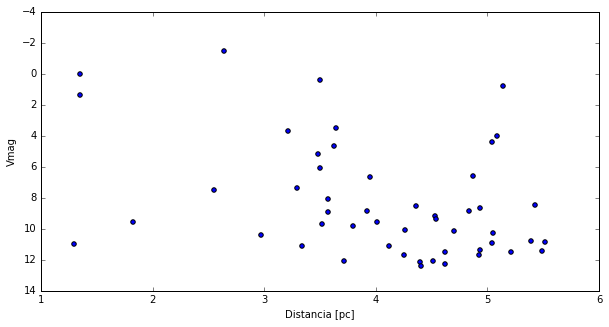

In [13]:
figure(figsize=(10, 5))
scatter(stars['Distancia en Parsecs'], stars['Magnitud'])
xlabel('Distancia [pc]')
ylabel('Vmag')
ax = gca()
ax.set_ylim(ax.get_ylim()[::-1])

In [ ]:
# Writes csv.
stars.to_csv('50stars_out.csv')